In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

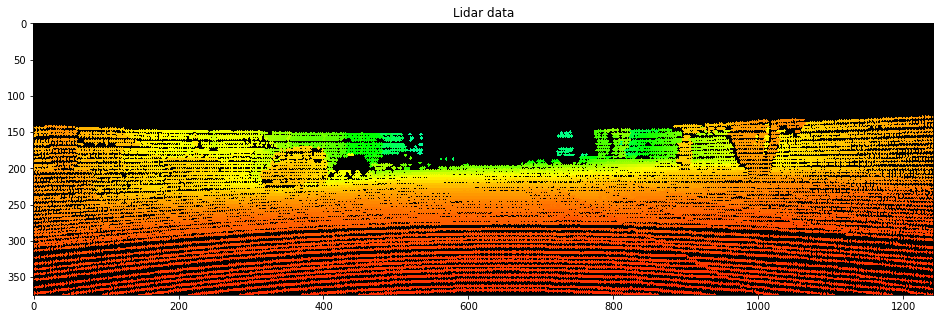

In [25]:
def show_lidar(dots):
    canvas = np.zeros((dots.shape[0],dots.shape[1],3),dtype=np.uint8)
    for i in range(dots.shape[0]):
        for j in range(dots.shape[1]):
            if dots[i][j]:
                cv2.circle(canvas, (j,i), 2, (int(dots[i][j]),255,255),-1)

    canvas = cv2.cvtColor(canvas, cv2.COLOR_HSV2RGB)
    #plt.subplots(1,1, figsize = (18,5)) #13,3
    #plt.title('Lidar data')
    #plt.imshow(canvas)
    return canvas

scan_file = '../data/left_gt/2011_09_26_drive_0001_sync/0000000000.npy'
dots = np.load(scan_file)
lidar = show_lidar(dots)
plt.subplots(1,1, figsize = (18,5))
plt.title('Lidar data')
plt.imshow(lidar)
plt.show()

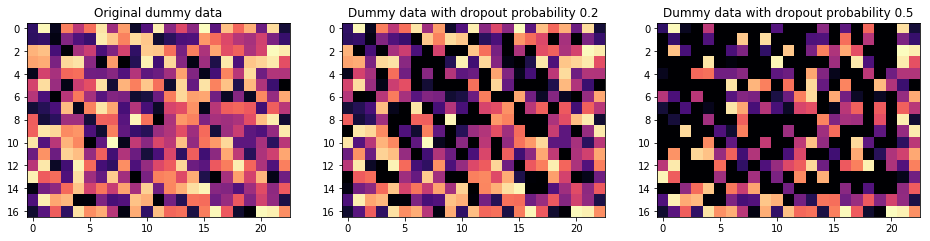

In [41]:
def random_sample_drop(array, prob=.2, kernel_size=3):
    new = array.copy()
    padding = int(kernel_size / 2)
    for x in range(padding, array.shape[1] - padding, kernel_size):
        for y in range(padding, array.shape[0] - padding, kernel_size):
            #locate kernel center = array[y][x]
            for i in range(x-padding, x+padding+1):
                for j in range(y-padding, y+padding+1):
                    p = np.random.random()
                    if p < prob:
                        new[j][i] = 0
                        
    return new

tile = np.random.random((17,23))
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,24))
ax1.set_title("Original dummy data")
ax1.imshow(tile, cmap='magma')
ax2.set_title("Dummy data with dropout probability 0.2")
ax2.imshow(random_sample_drop(tile, prob=.2), cmap='magma')
ax3.set_title("Dummy data with dropout probability 0.5")
ax3.imshow(random_sample_drop(tile, prob=.5), cmap='magma')
plt.show()

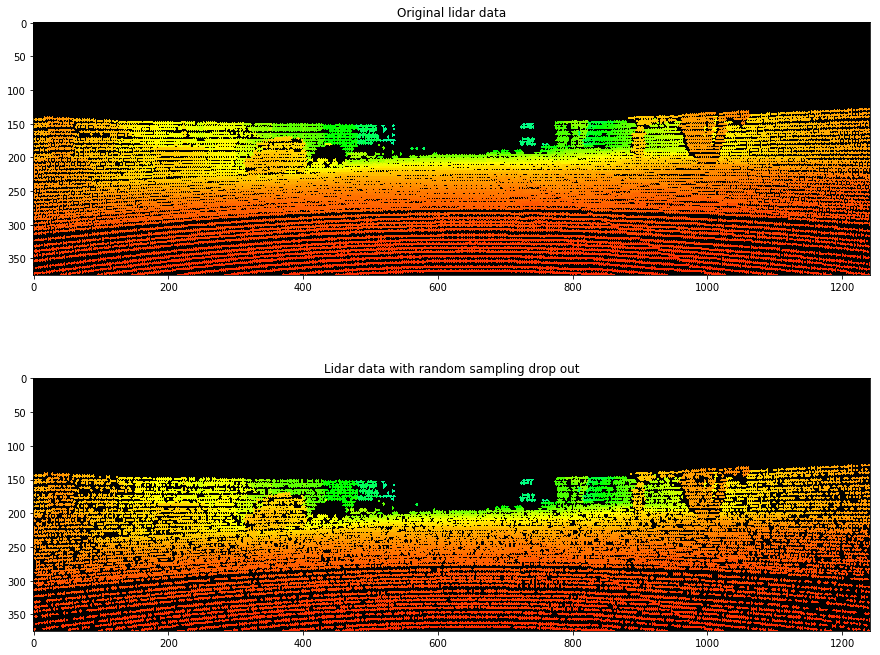

In [31]:
dots_dropped = random_sample_drop(dots)
f, (ax1, ax2) = plt.subplots(2,1, figsize=(15,12))
ax1.set_title("Original lidar data")
ax1.imshow(show_lidar(dots))
ax2.set_title("Lidar data with random sampling dropout")
ax2.imshow(show_lidar(dots_dropped))
plt.show()